# This netbook is for interpolation of LPP of asymmetric bilayers
## specifically for cancer, mammalian, 3 and 4 lipid bilayers

In [4]:

#Here are the things to consider when using this program:
# 1) make sure that the file contains only 2 cloumns of data: one of distance and the other of pressure values
# 2) both distances: positive and negative contain the same number of values, for e.g from -3.8 to 3.8 (not -3.8 to 4.0)
# 3) make sure that the pressure profile is centered properly, with the highest values in the center (at distance 0 nm)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 


negative_dist = []
negative_lpp = []
positive_dist = []
positive_lpp = []

lpp_at_zero = 0

averaged_lpp = []
not_averaged_lpp = [] #this will take all the negative and positive pressure values from c_lateralpressure.xvg
all_dist = [] #this will take all the distance values
all_lpp = []

df = pd.read_csv('c_lateralpressure.xvg', header=None, delimiter='\s+') #be careful of the delimiter used! A single space is different than multiple spaces
#file = open("251-500_averaged_leaflets.xvg", "w") # create the file object to write data in it
#df.iloc[:,1] #prints the first column
#df.iloc[0][1] #prints the value on row 0 and cloumn 1

for i in range(0, df.iloc[:,1].count()):
    if df.iloc[i][0] < 0:
        negative_dist.append(df.iloc[i][0]) #all negative distances (lower than 0) go in this list
        negative_lpp.append(df.iloc[i][1])
        not_averaged_lpp.append(df.iloc[i][1])
        all_dist.append(df.iloc[i][0])
                
    elif df.iloc[i][0] == 0:
        
        lpp_at_zero = df.iloc[i][1]

    elif df.iloc[i][0] > 0:
        positive_dist.append(df.iloc[i][0])
        positive_lpp.append(df.iloc[i][1])
        not_averaged_lpp.append(df.iloc[i][1])
        all_dist.append(df.iloc[i][0])

#print(not_averaged_lpp) #prints all pressure values
#print(all_dist) # has all distance values

#Following will be the actual interpolation code

f = interp1d(all_dist, not_averaged_lpp, kind='cubic') #all_lpp is the data we need to interpolate
file1 = open("int_751-1000_c_lateralpressure.xvg", "w")

dist_int = np.arange(-3.6, 3.6, 0.01) #here you give the range on x-axis where you need to interpolate

lpp_int = f(dist_int)

for i in range(0, len(dist_int)-1):
#    print(dist_int[i], lpp_int[i])
    file1.write(""+str(dist_int[i])+" "+str(lpp_int[i])+"\n")

file1.close()

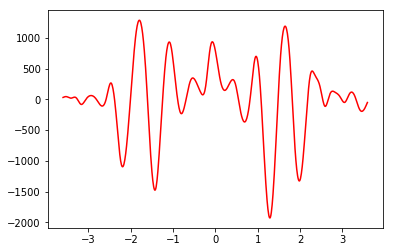

In [14]:
plt.plot(dist_int, lpp_int, 'r-')

In [12]:
pwd

'/Users/Ganesh/Google Drive/jupyter/stress_4lipidbilayer/751-1000'

In [11]:
cd ../751-1000

/Users/Ganesh/Google Drive/jupyter/stress_4lipidbilayer/751-1000
